In [216]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [217]:
train=pd.read_csv('D:\python\Project\Taitanic/train.csv')

In [218]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
test=pd.read_csv('D:\python\Project\Taitanic/test.csv')

In [220]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [221]:
train.shape

(891, 12)

In [222]:
test.shape

(418, 11)

In [223]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [224]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

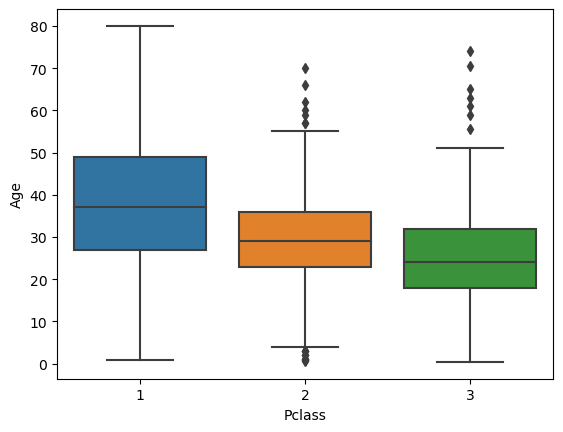

In [225]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [226]:
age_pclass=train[['Age','Pclass']]
age_pclass1=age_pclass.loc[age_pclass['Pclass']==1]
age_pclass2=age_pclass.loc[age_pclass['Pclass']==2]
age_pclass3=age_pclass.loc[age_pclass['Pclass']==3]

In [227]:
mean1=age_pclass1['Age'].mean()
mean2=age_pclass2['Age'].mean()
mean3=age_pclass3['Age'].mean()

In [228]:
if  train[train['Pclass']==3].bool:
    train['Age']=train['Age'].fillna(mean3)
if  train[train['Pclass']==2].bool:
    train['Age']=train['Age'].fillna(mean2)
if  train[train['Pclass']==1].bool:
    train['Age']=train['Age'].fillna(mean1)

In [229]:
train['Age'].isnull().sum()

0

In [230]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
train.drop('Cabin', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)

In [232]:
test.drop('Cabin', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [233]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

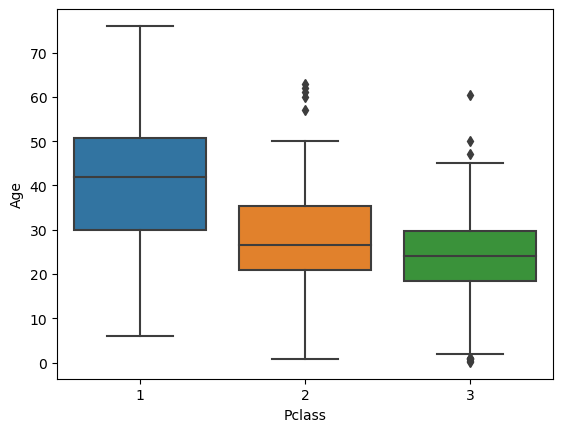

In [234]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [235]:
a=test[test['Pclass']==3]
a['Age'].max()

60.5

In [236]:
test=test.drop(test[(test['Pclass']==3) & (test['Age']==60.5)].index)

In [237]:
age_pclass=test[['Age','Pclass']]
age_pclass1=age_pclass.loc[age_pclass['Pclass']==1]
age_pclass2=age_pclass.loc[age_pclass['Pclass']==2]
age_pclass3=age_pclass.loc[age_pclass['Pclass']==3]
mean1=age_pclass1['Age'].mean()
mean2=age_pclass2['Age'].mean()
mean3=age_pclass3['Age'].mean()
if  test[test['Pclass']==3].bool:
    test['Age']=test['Age'].fillna(mean3)
if  test[test['Pclass']==2].bool:
    test['Age']=test['Age'].fillna(mean2)
if  test[test['Pclass']==1].bool:
    test['Age']=test['Age'].fillna(mean1)

In [238]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [239]:
train.dropna(inplace=True)

In [240]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Fare
Age


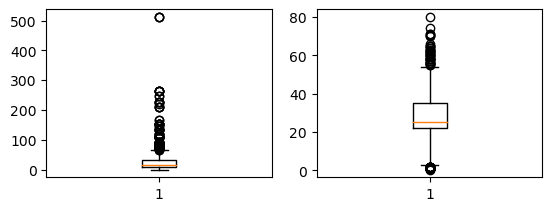

In [241]:
#OUTLIERS
data1 = train[['Fare','Age']]
fig = plt.figure()
for i in range(data1.shape[1]):
    sub = fig.add_subplot(2, 2, i+1)
    sub.boxplot(data1.iloc[:,i])
    print(data1.columns[i])
plt.show()

In [242]:
train['Fare'].max()

512.3292

In [243]:
train=train.drop(train[train['Fare']==512.3292].index)

In [244]:
y=train['Survived']

In [245]:
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),["Pclass", "Sex", "SibSp", "Parch",'Embarked'])], remainder='passthrough')
train1=ct.fit_transform(train)
test1=ct.fit_transform(test)

In [246]:
train1=pd.DataFrame(train1)
test1=pd.DataFrame(test1)

In [247]:
train1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,38.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,26.0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,35.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,35.0,8.0500


In [248]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train1, y)


RandomForestClassifier(max_depth=5, random_state=1)

In [249]:
predictions = model.predict(test1)

In [250]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [251]:
output.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
